<a href="https://colab.research.google.com/github/Fermu25/Cursos/blob/main/tarea%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 3 –
En el conjunto de datos GLT, el atributo AverageTemperature contenía valores faltantes.

Se detectaron un número considerable de valores en blanco, pero dado el tamaño del conjunto su proporción es pequeña respecto al total.

Ejercicio 4 –
4.1 Ciudades más fría y más caliente

La temperatura más baja registrada se encuentra en Moscú, con valores cercanos a –30 °C, lo cual es consistente con el clima continental extremo de Rusia.

La temperatura más alta se detectó en Bangkok, con valores alrededor de 40 °C. Sin embargo, estos resultados deben analizarse con cautela, pues pueden estar afectados por anomalías en los datos.

4.2 Distribución de temperaturas: Roma y Bangkok

Roma: presenta una distribución centrada alrededor de temperaturas templadas, entre 5 y 25 °C. La forma es bastante regular, con variaciones estacionales claras.

Bangkok: la distribución es extrañamente más amplia y desplazada hacia valores muy altos, con temperaturas que parecen poco realistas para su latitud y clima.

4.3 Análisis de anomalías

La gran diferencia en magnitudes entre Roma y Bangkok sugiere que no se trata de un efecto climático real, sino de un problema en los datos. Es posible que las temperaturas se registraran inicialmente en Fahrenheit y luego se interpretaran como Celsius. O si se colocaron sensores en zonas urbanas muy calientes o en lugares no representativos, se podría haber sesgado la información.

4.4 Tendencias y cambio climático

Se calcularon las temperaturas medias anuales para las 10 ciudades.
En la mayoría de las ciudades se aprecia una tendencia de incremento gradual en la temperatura media anual desde el siglo XIX hasta el XXI.

El aumento no es lineal: se observa cierta estabilidad en periodos del siglo XIX, con varios picos.

Al dividir en periodos de 5, 10 y 25 años, se aprecia que el cambio climático es lineal, casi constante, no se aprecia un aumento significativo.

Vista inicial de los datos:
         Date  AverageTemperature  AverageTemperatureUncertainty     City  \
0  1849-01-01              26.704                          1.435  Abidjan   
1  1849-02-01              27.434                          1.362  Abidjan   
2  1849-03-01                 NaN                            NaN  Abidjan   
3  1849-04-01              26.140                          1.387  Abidjan   
4  1849-05-01              25.427                          1.200  Abidjan   

         Country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W  
3  Côte D'Ivoire    5.63N     3.23W  
4  Côte D'Ivoire    5.63N     3.23W  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219575 entries, 0 to 219574
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date                           219575 non-nu

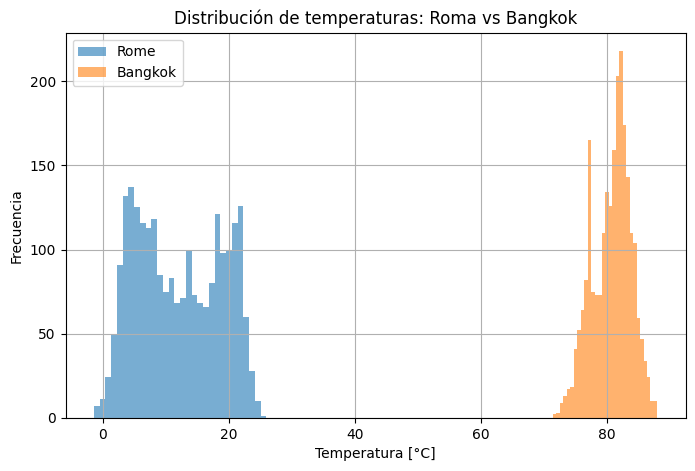

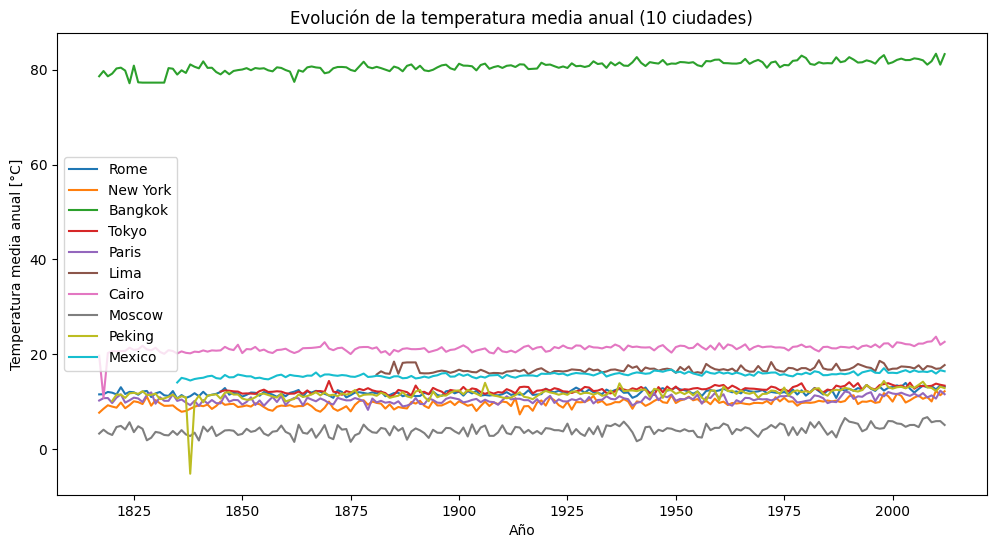

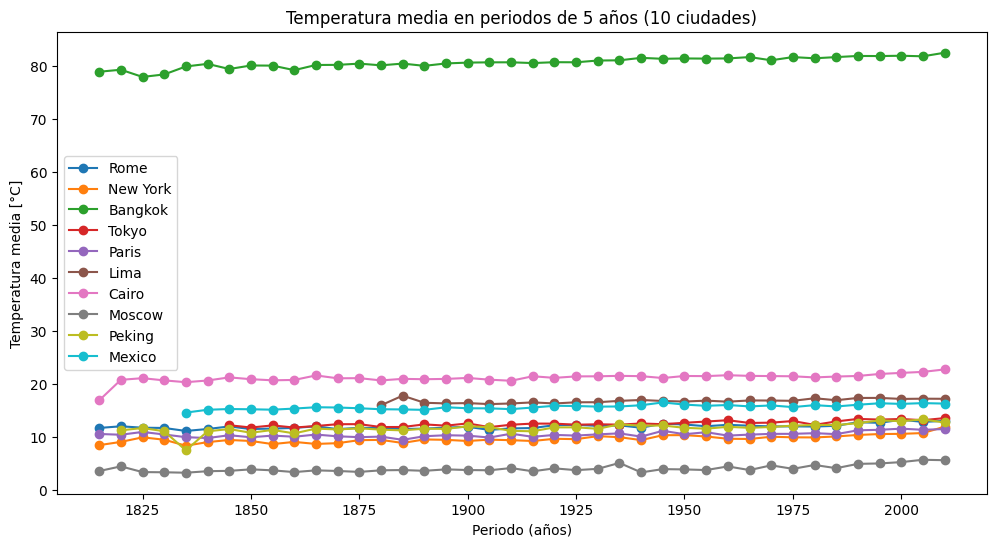

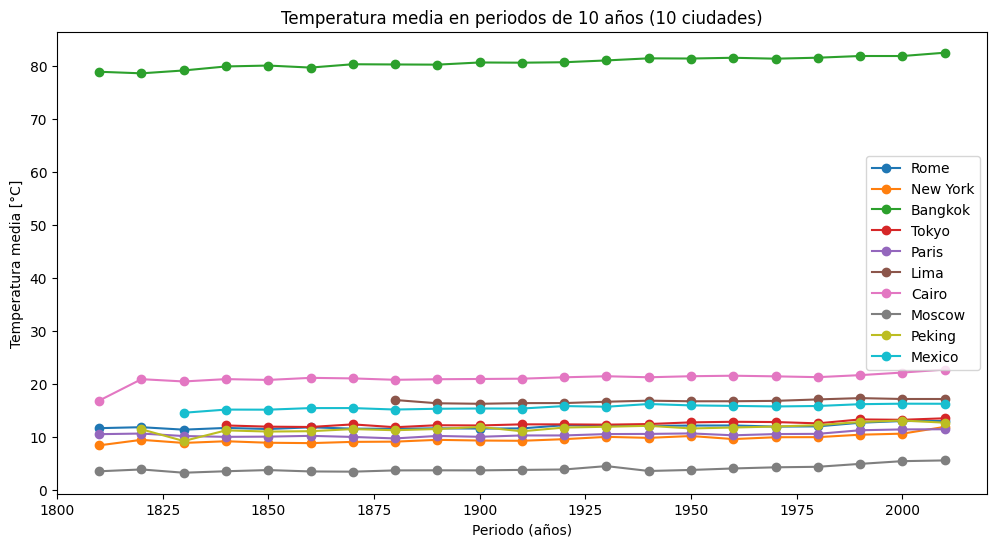

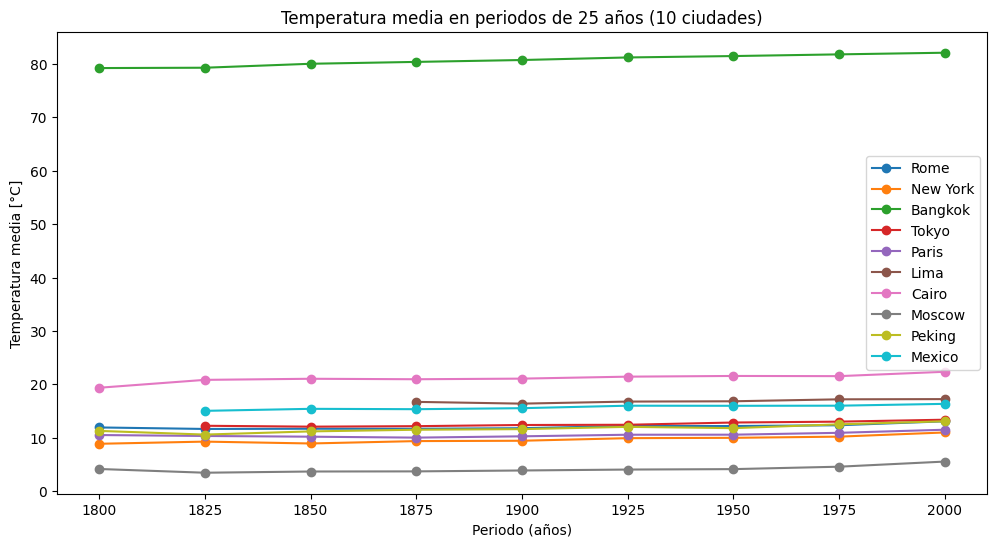

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ========================
# Ejercicio 3
# ========================

df = pd.read_csv("GLT_filtrado.csv", encoding="utf-8")

print("Vista inicial de los datos:")
print(df.head())
print(df.info())

faltantes = df["AverageTemperature"].isna().sum()
print(f"Valores faltantes en AverageTemperature: {faltantes}")

def llenar_faltantes(lista):
    datos = np.array([float(x) if not pd.isna(x) else np.nan for x in lista])
    for i in range(len(datos)):
        if np.isnan(datos[i]):
            # Buscar previo
            previo = 0
            for j in range(i-1, -1, -1):
                if not np.isnan(datos[j]):
                    previo = datos[j]
                    break
            # Buscar siguiente
            siguiente = 0
            for j in range(i+1, len(datos)):
                if not np.isnan(datos[j]):
                    siguiente = datos[j]
                    break
            datos[i] = (previo + siguiente) / 2
    return datos.tolist()

# Aplicar por ciudad
df["AverageTemperature"] = df.groupby("City")["AverageTemperature"].transform(llenar_faltantes)

print("Valores faltantes después de procesar:", df["AverageTemperature"].isna().sum())

# ========================
# Ejercicio 4.1: Ciudades más fría y más caliente
# ========================

ciudades = ["Rome", "New York", "Bangkok", "Tokyo", "Paris", "Lima", "Cairo", "Moscow", "Peking", "Mexico"]
subset = df[df["City"].isin(ciudades)].copy()

max_temp = subset.loc[subset["AverageTemperature"].idxmax()]
min_temp = subset.loc[subset["AverageTemperature"].idxmin()]

print("Temperatura más alta:", max_temp["AverageTemperature"], "°C en", max_temp["City"])
print("Temperatura más baja:", min_temp["AverageTemperature"], "°C en", min_temp["City"])

# ========================
# Ejercicio 4.2: Distribución de temperaturas Roma vs Bangkok
# ========================

plt.figure(figsize=(8,5))
subset[subset["City"]=="Rome"]["AverageTemperature"].hist(alpha=0.6, bins=30, label="Rome")
subset[subset["City"]=="Bangkok"]["AverageTemperature"].hist(alpha=0.6, bins=30, label="Bangkok")
plt.xlabel("Temperatura [°C]")
plt.ylabel("Frecuencia")
plt.title("Distribución de temperaturas: Roma vs Bangkok")
plt.legend()
plt.show()

# ========================
# Ejercicio 4.3: Análisis de anomalías
# ========================

# ========================
# Ejercicio 4.4: Promedio anual por ciudad y tendencia
# ========================
df["Year"] = pd.to_datetime(df["Date"]).dt.year
subset["Year"] = pd.to_datetime(subset["Date"]).dt.year

promedios_anuales = subset.groupby(["City","Year"])["AverageTemperature"].mean().reset_index()
plt.figure(figsize=(12,6))
for city in ciudades:
    data = promedios_anuales[promedios_anuales["City"]==city]
    plt.plot(data["Year"], data["AverageTemperature"], label=city)
plt.xlabel("Año")
plt.ylabel("Temperatura media anual [°C]")
plt.title("Evolución de la temperatura media anual (10 ciudades)")
plt.legend()
plt.show()

# Promedios por periodos
def graficar_periodos(periodo):
    promedios_periodo = subset.copy()
    promedios_periodo["Periodo"] = (promedios_periodo["Year"] // periodo) * periodo
    resumen_periodo = promedios_periodo.groupby(["City","Periodo"])["AverageTemperature"].mean().reset_index()

    plt.figure(figsize=(12,6))
    for city in ciudades:
        data = resumen_periodo[resumen_periodo["City"]==city]
        plt.plot(data["Periodo"], data["AverageTemperature"], marker="o", label=city)
    plt.xlabel("Periodo (años)")
    plt.ylabel("Temperatura media [°C]")
    plt.title(f"Temperatura media en periodos de {periodo} años (10 ciudades)")
    plt.legend()
    plt.show()

# 5, 10 y 25 años
for p in [5, 10, 25]:
    graficar_periodos(p)